In [1]:
!pip install pyresparser

In [3]:
!pip install pdfplumber

  Using cached pdfplumber-0.6.2-py3-none-any.whl (36 kB)
  Using cached pdfminer.six-20220319-py3-none-any.whl (5.6 MB)
  Attempting uninstall: pdfminer.six
    Found existing installation: pdfminer.six 20191110
    Uninstalling pdfminer.six-20191110:
      Successfully uninstalled pdfminer.six-20191110


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
textract 1.6.5 requires pdfminer.six==20191110, but you have pdfminer-six 20220319 which is incompatible.


In [34]:

!pip install textract

In [1]:
# Setup
!pip install -q wordcloud
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

import pandas as pd
import matplotlib.pyplot as plt
import io
import unicodedata
import numpy as np
import re
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\homep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\homep\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\homep\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\homep\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [1]:
import os
import uuid
import textract
import pandas as pd
import numpy as np
import re
import unicodedata
import sys
import nltk
import matplotlib.pyplot as plt
#nltk.download()

In [6]:
# original resume directory
source_directory = "/content/sample_data/Resumes"

In [7]:
source_directory

'/content/sample_data/Resumes'

In [2]:
df = pd.DataFrame()

In [10]:
source_directory = "/content/sample_data/Resumes"
# create training directory to store resumes converted in text format
training_directory = os.path.join("/content/sample_data", "train data")

for process_file in  os.listdir(source_directory):
  if not process_file.startswith('.'):
    file, extension = os.path.splitext(process_file)
    
    # We create a new text file name by concatenating the .txt extension to file UUID
    dest_file_path = file + '.txt'
    #extract text from the file
    content = textract.process(os.path.join(source_directory, process_file))

    df = df.append([[content]],ignore_index=True)
    
    # We create and open the new and we prepare to write the Binary Data which is represented by the wb - Write Binary
    write_text_file = open(os.path.join(training_directory, dest_file_path), "wb")

    # write the content 
    write_text_file.write(content)
    # close the newly created file
    write_text_file.close()

In [3]:
import os
import uuid
import textract
import pandas as pd
import numpy as np
import re
import unicodedata
import sys
import nltk
#nltk.download()

In [13]:
# original resume directory
source_directory = "/content/sample_data/Resumes"

In [14]:
df =pd.DataFrame()

In [15]:
source_directory = "/content/sample_data/Resumes"
# create training directory to store resumes converted in text format
training_directory = os.path.join("/content/sample_data", "train data")

for process_file in  os.listdir(source_directory):
  if not process_file.startswith('.'):
    file, extension = os.path.splitext(process_file)
    
    # We create a new text file name by concatenating the .txt extension to file UUID
    dest_file_path = file + '.txt'
    #print(file, "  ",extension,"  "+dest_file_path)
    #extract text from the file
    content = textract.process(os.path.join(source_directory, process_file))

    df = df.append([[content]],ignore_index=True)
    
    # We create and open the new and we prepare to write the Binary Data which is represented by the wb - Write Binary
    write_text_file = open(os.path.join(training_directory, dest_file_path), "wb")

    # write the content 
    write_text_file.write(content)
    # close the newly created file
    write_text_file.close()

In [16]:
df.head()

,0
0,b'\n [pic]\n [pic]\n\n \xe2\x80\xa2 3.3 y...
1,b'Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\...
2,b'Srikanth (WORKDAY hCM Consultant)\t ...
3,"b""\nMaryala Vinay Reddy\n\nProfessional Summar..."
4,b'\n CURRICULUM V...


In [17]:
df.tail()

,0
74,b'Vinay kumar .v\nWorkday Functional Consultan...
75,b'Venkatalakshmi Pedireddy\n\nSoftware Develop...
76,"b""\n\n\n\n\n \xe2\x80\x9c Hyderabad\nNazeer Ba..."
77,b'RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfession...
78,b'Chinna Subbarayudu M\n\nDOB: 06th March 1994...


In [19]:
df.columns =['Resumes']

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Resumes  79 non-null     object
dtypes: object(1)
memory usage: 760.0+ bytes


In [21]:
df['Resumes'] =df['Resumes'].apply(lambda x : x.decode('utf-8'))

In [11]:
## Exporting the data into csv files
df.to_csv('resumes.csv',encoding ='utf-8',index =False)

In [4]:
df =pd.read_csv("resumes.csv", encoding='utf-8')

In [5]:
df.head(10)

,Unnamed: 0,Resumes
0,0,pic pic 3 3 years of it experience...
1,1,priyabrata hota career objective pur...
2,2,srikanth workday hcm consultant ...
3,3,maryala vinay reddy professional summary ...
4,4,curriculum vitae anjani priyadarshini ob...
5,5,workday hcm techno functional consultant ...
6,6,sarala madasu sarala madasu 204 sri geethi...
7,7,sql developer name bandi prem sai car...
8,8,peoplesoft admin peoplesoft dba ganesh alladi...
9,9,arun venu experience summary exper...


In [25]:
df.duplicated(subset=None,keep ='first')

0     False
1     False
2     False
3     False
4     False
      ...  
74    False
75    False
76    False
77    False
78    False
Length: 79, dtype: bool

In [6]:
df.drop_duplicates(inplace=True)

In [27]:
df.shape

(79, 1)

In [28]:
#Data Cleaning
#dictionary of punctuation marks
import sys
import unicodedata
keys = [i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P')]
# punctuation = dict.fromkeys(i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P'))
punctuation = dict.fromkeys(keys,' ')
#dictionary of new_line '\n' and tab '\t'
new_line_tab = str.maketrans({chr(10): ' ', chr(9): ' '})

In [29]:
import re
def preprocessor(text):
    text = re.sub('\n', ' ', text) # remove new lines
    text = re.sub('\t', ' ', text)
    text = re.sub('❖',"",text) # remove tabs
    text = re.sub('@[A-Za-z0–9]+', ' ', text) #Removing tag(@)
    text = re.sub('#', ' ', text) # Removing hashtag(#)
    text = re.sub(r'http\S+', ' ', text) #remove https links
    text = re.sub(':', ' ', text) # remove tabs
    text = re.sub('<[^<]+?>', ' ', text) #remove html tags
    text = re.sub(r'[^\w]', ' ', text) #remove non alphanumerc characters
    text = text.translate(punctuation)
    text = text.lower()
    text = text.strip()
    text = text.translate(new_line_tab)
    return text
df['Resumes'] = df.Resumes.apply(lambda x: preprocessor(x))

In [30]:
df.head()

,Resumes
0,pic pic 3 3 years of it experience...
1,priyabrata hota career objective pur...
2,srikanth workday hcm consultant ...
3,maryala vinay reddy professional summary ...
4,curriculum vitae anjani priyadarshini ob...


In [33]:
df.to_csv('resumes.csv')

In [7]:
data = pd.read_csv("resumes.csv", encoding='utf-8')
data.head(10)

,Unnamed: 0,Resumes
0,0,pic pic 3 3 years of it experience...
1,1,priyabrata hota career objective pur...
2,2,srikanth workday hcm consultant ...
3,3,maryala vinay reddy professional summary ...
4,4,curriculum vitae anjani priyadarshini ob...
5,5,workday hcm techno functional consultant ...
6,6,sarala madasu sarala madasu 204 sri geethi...
7,7,sql developer name bandi prem sai car...
8,8,peoplesoft admin peoplesoft dba ganesh alladi...
9,9,arun venu experience summary exper...


In [8]:
data= data.drop('Unnamed: 0', axis = 1)
data

,Resumes
0,pic pic 3 3 years of it experience...
1,priyabrata hota career objective pur...
2,srikanth workday hcm consultant ...
3,maryala vinay reddy professional summary ...
4,curriculum vitae anjani priyadarshini ob...
...,...
74,vinay kumar v workday functional consultant ...
75,venkatalakshmi pedireddy software developer ...
76,hyderabad nazeer basha sql and power bi devel...
77,raju pavana kumari professional summary...


In [9]:
Category = ['Workday','Peoplesoft','Workday','React Developer','React Developer','Workday','React Developer','SQL Developer','Peoplesoft','Peoplesoft','React Developer','React Developer','React Developer','Peoplesoft','SQL Developer','React Developer','SQL Developer','Peoplesoft','React Developer','SQL Developer','React Developer','Workday','Other','Peoplesoft','SQL Developer','React Developer','Workday','SQL Developer','React Developer','Peoplesoft','Workday','React Developer','SQL Developer','Workday','React Developer','Workday','Peoplesoft','Peoplesoft','Peoplesoft','Peoplesoft','Workday','Other','SQL Developer','SQL Developer','Workday','Workday','Peoplesoft','Peoplesoft','React Developer','React Developer','Workday','Workday','React Developer','Peoplesoft','Peoplesoft','Peoplesoft','SQL Developer','Peoplesoft','Peoplesoft','React Developer','React Developer','SQL Developer','Workday','Workday','Workday','Workday','React Developer','SQL Developer','Peoplesoft','React Developer','Workday','Peoplesoft','Workday','React Developer','Workday','React Developer','SQL Developer','SQL Developer','Workday']
data['Category'] = Category

In [10]:
data

,Resumes,Category
0,pic pic 3 3 years of it experience...,Workday
1,priyabrata hota career objective pur...,Peoplesoft
2,srikanth workday hcm consultant ...,Workday
3,maryala vinay reddy professional summary ...,React Developer
4,curriculum vitae anjani priyadarshini ob...,React Developer
...,...,...
74,vinay kumar v workday functional consultant ...,Workday
75,venkatalakshmi pedireddy software developer ...,React Developer
76,hyderabad nazeer basha sql and power bi devel...,SQL Developer
77,raju pavana kumari professional summary...,SQL Developer


In [15]:
## Exporting the data into csv files
data.to_csv('clean_resumes1.csv',encoding ='utf-8',index =False)

In [16]:
clean= pd.read_csv('clean_resumes1.csv',encoding ='utf-8')
clean

,Resumes,Category
0,pic pic 3 3 years of it experience...,Workday
1,priyabrata hota career objective pur...,Peoplesoft
2,srikanth workday hcm consultant ...,Workday
3,maryala vinay reddy professional summary ...,React Developer
4,curriculum vitae anjani priyadarshini ob...,React Developer
...,...,...
74,vinay kumar v workday functional consultant ...,Workday
75,venkatalakshmi pedireddy software developer ...,React Developer
76,hyderabad nazeer basha sql and power bi devel...,SQL Developer
77,raju pavana kumari professional summary...,SQL Developer


In [16]:
print (data['Category'].value_counts())

React Developer    22
Workday            21
Peoplesoft         20
SQL Developer      14
Other               2
Name: Category, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Category'>

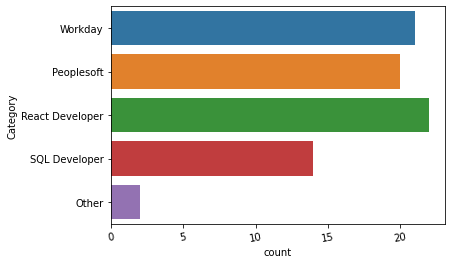

In [9]:
import seaborn as sns

plt.xticks(rotation=10)           
sns.countplot(y="Category", data=data)

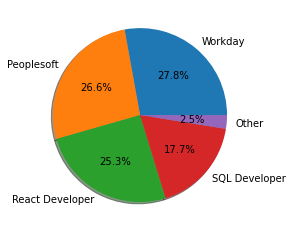

In [23]:
from matplotlib.gridspec import GridSpec
targetCounts = data['Category'].value_counts()
targetLabels  = data['Category'].unique()

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data["Category_N"] = labelencoder.fit_transform(data["Category"])
# print(type(labels))

data

,Resumes,Category,Category_N
0,pic pic 3 3 years of it experience...,Workday,4
1,priyabrata hota career objective pur...,Peoplesoft,1
2,srikanth workday hcm consultant ...,Workday,4
3,maryala vinay reddy professional summary ...,React Developer,2
4,curriculum vitae anjani priyadarshini ob...,React Developer,2
...,...,...,...
74,vinay kumar v workday functional consultant ...,Workday,4
75,venkatalakshmi pedireddy software developer ...,React Developer,2
76,hyderabad nazeer basha sql and power bi devel...,SQL Developer,3
77,raju pavana kumari professional summary...,SQL Developer,3


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

Text = data['Resumes'].values
op_labels = data['Category'].values
word_vectorizer = TfidfVectorizer(max_features = 1500)
word_vectorizer.fit(Text)
features = word_vectorizer.transform(Text)

In [15]:
features

<79x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 18665 stored elements in Compressed Sparse Row format>

In [12]:
word_vectorizer.get_feature_names()

['03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '10',
 '100',
 '10g',
 '11',
 '11g',
 '11gr2',
 '12',
 '12c',
 '12cr1',
 '12cr2',
 '15',
 '16',
 '17',
 '19',
 '2003',
 '2007',
 '2008',
 '2008r2',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '22',
 '24',
 '30',
 '31',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '64bit',
 '80',
 'abilities',
 'ability',
 'about',
 'above',
 'absence',
 'academic',
 'accenture',
 'acceptance',
 'access',
 'according',
 'account',
 'accounts',
 'achieve',
 'achievements',
 'across',
 'active',
 'activities',
 'activity',
 'add',
 'added',
 'adding',
 'additional',
 'addm',
 'address',
 'admin',
 'administration',
 'administrator',
 'adp',
 'advance',
 'advanced',
 'ae',
 'affiliated',
 'after',
 'ag',
 'against',
 'aggregate',
 'agile',
 'aig',
 'all',
 'alone',
 'along',
 'also',
 'alter',
 'alteraudit',
 'am',
 'american',
 'an',
 'analysis',
 'analyst',
 'anal

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,op_labels,random_state=0, test_size=0.2)

In [19]:
X_train.shape

(63, 1500)

In [20]:
X_test.shape

(16, 1500)

In [21]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.97
Accuracy of KNeighbors Classifier on test set: 1.00


In [33]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         2
React Developer       1.00      1.00      1.00         4
  SQL Developer       1.00      1.00      1.00         3
        Workday       1.00      1.00      1.00         7

       accuracy                           1.00        16
      macro avg       1.00      1.00      1.00        16
   weighted avg       1.00      1.00      1.00        16




In [22]:
from sklearn.naive_bayes import MultinomialNB

clf = OneVsRestClassifier(MultinomialNB()).fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of MultinomialNB Classifier on training set: 0.97
Accuracy of MultinomialNB Classifier on test set: 1.00

 Classification report for classifier OneVsRestClassifier(estimator=MultinomialNB()):
                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         2
React Developer       1.00      1.00      1.00         4
  SQL Developer       1.00      1.00      1.00         3
        Workday       1.00      1.00      1.00         7

       accuracy                           1.00        16
      macro avg       1.00      1.00      1.00        16
   weighted avg       1.00      1.00      1.00        16




In [23]:
from sklearn.naive_bayes import BernoulliNB

clf = OneVsRestClassifier(BernoulliNB()).fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of BernoulliNB Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of BernoulliNB Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of BernoulliNB Classifier on training set: 0.94
Accuracy of BernoulliNB Classifier on test set: 0.88

 Classification report for classifier OneVsRestClassifier(estimator=BernoulliNB()):
                 precision    recall  f1-score   support

     Peoplesoft       1.00      0.50      0.67         2
React Developer       0.67      1.00      0.80         4
  SQL Developer       1.00      0.67      0.80         3
        Workday       1.00      1.00      1.00         7

       accuracy                           0.88        16
      macro avg       0.92      0.79      0.82        16
   weighted avg       0.92      0.88      0.87        16




In [28]:
from sklearn.ensemble import RandomForestClassifier

clf = OneVsRestClassifier(RandomForestClassifier()).fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of RandomForestClassifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of RandomForestClassifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of RandomForestClassifier on training set: 1.00
Accuracy of RandomForestClassifier on test set: 1.00

 Classification report for classifier OneVsRestClassifier(estimator=RandomForestClassifier()):
                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         2
React Developer       1.00      1.00      1.00         4
  SQL Developer       1.00      1.00      1.00         3
        Workday       1.00      1.00      1.00         7

       accuracy                           1.00        16
      macro avg       1.00      1.00      1.00        16
   weighted avg       1.00      1.00      1.00        16




In [29]:
from sklearn.ensemble import AdaBoostClassifier

clf = OneVsRestClassifier(AdaBoostClassifier()).fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of AdaBoostClassifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of AdaBoostClassifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of AdaBoostClassifier on training set: 1.00
Accuracy of AdaBoostClassifier on test set: 0.88

 Classification report for classifier OneVsRestClassifier(estimator=AdaBoostClassifier()):
                 precision    recall  f1-score   support

     Peoplesoft       0.50      1.00      0.67         2
React Developer       1.00      0.75      0.86         4
  SQL Developer       1.00      0.67      0.80         3
        Workday       1.00      1.00      1.00         7

       accuracy                           0.88        16
      macro avg       0.88      0.85      0.83        16
   weighted avg       0.94      0.88      0.89        16




In [30]:
from sklearn.ensemble import GradientBoostingClassifier

clf = OneVsRestClassifier(GradientBoostingClassifier()).fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of GradientBoostingClassifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of GradientBoostingClassifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of GradientBoostingClassifier on training set: 1.00
Accuracy of GradientBoostingClassifier on test set: 0.88

 Classification report for classifier OneVsRestClassifier(estimator=GradientBoostingClassifier()):
                 precision    recall  f1-score   support

          Other       0.00      0.00      0.00         0
     Peoplesoft       0.67      1.00      0.80         2
React Developer       1.00      0.75      0.86         4
  SQL Developer       1.00      1.00      1.00         3
        Workday       1.00      0.86      0.92         7

       accuracy                           0.88        16
      macro avg       0.73      0.72      0.72        16
   weighted avg       0.96      0.88      0.91        16




C:\Users\homep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\homep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\homep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.ensemble import ExtraTreesClassifier

clf = OneVsRestClassifier(ExtraTreesClassifier()).fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of ExtraTreesClassifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of ExtraTreesClassifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of ExtraTreesClassifier on training set: 1.00
Accuracy of ExtraTreesClassifier on test set: 1.00

 Classification report for classifier OneVsRestClassifier(estimator=ExtraTreesClassifier()):
                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         2
React Developer       1.00      1.00      1.00         4
  SQL Developer       1.00      1.00      1.00         3
        Workday       1.00      1.00      1.00         7

       accuracy                           1.00        16
      macro avg       1.00      1.00      1.00        16
   weighted avg       1.00      1.00      1.00        16




In [40]:
Clean_Resumes = data['Resumes']
print (data['Resumes'][31])

thirupathamma balla    summary     2 8 year of it experience as react developer    worked on technologies like react  javascript    experience in developing business applications for the internet using react   experience in object oriented programming concepts    strong analytical ability skills   enthusiastic  eager to meet challenges and quick to learn and assimilate new   concepts and ideas   ability to work efficiently  either independently or on a team with minimal supervision and without ever missing a deadline   brief profile    work experience     2 8 year s    current employer     predifast technologies private limited    react developer   industry     it software software services  highest degree     b  tech  eee   current     hyderabad  date of birth  gender      5th november  1999    summary of skills   experience    work experience  duration     mar 2020   till date  company     predifast technologies private limited     designation     react developer   job profile      d

[('experience', 598), ('peoplesoft', 453), ('workday', 431), ('application', 418), ('using', 395), ('server', 359), ('data', 332), ('reports', 325), ('project', 325), ('sql', 280), ('business', 273), ('web', 250), ('database', 243), ('process', 236), ('8', 225), ('2', 221), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 181), ('like', 180), ('support', 178), ('skills', 171), ('good', 169), ('development', 168), ('team', 166), ('9', 166), ('creating', 164), ('working', 162), ('technical', 160), ('people', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('created', 150), ('testing', 150), ('react', 148), ('various', 146), ('1', 143), ('role', 142), ('oracle', 142), ('developer', 139), ('environment', 139), ('responsibilities', 137)]


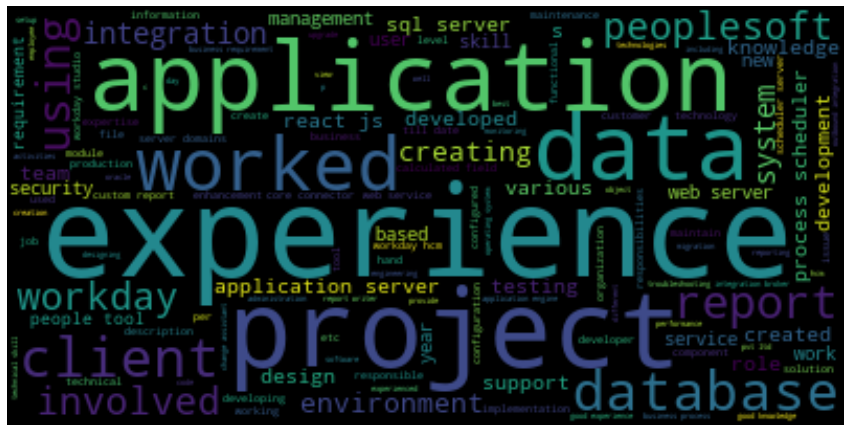

In [43]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['Resumes'].values
cleanedSentences = ""
for i in range(0,79):
    cleanedText = Clean_Resumes[i]
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()